# Customer Churn in Telco Industry

## Contents 

1. [Business Problem](#Business-Problem)
2. [Data Understanding](#Data-Understanding)
3. [EDA](#EDA)
4. [Data Preprocessing](#Data-Preprocessing)
5. [Modeling](#Modeling)
    - [Model Benchmarking: Stratified K-Fold No Resampler](#Model-Benchmarking:-Stratified-K-Fold-No-Resampler)
    - [Model Benchmarking: Test Data No Resampler](#Model-Benchmarking:-Test-Data-No-Resampler)
    - [Model Benchmarking: Resampling Cross Validation](#Benchmark-Models:-Resampling-Cross-Validation)
    - [Model Benchmarking: Resampling Train & Test Data](#Benchmark-Models:-Resampling-Test-&-Train-Data)
    - [Comparison of Benchmark Models with Resampling](#Comparison-of-Benchmark-Models-with-Resampling)
7. [Hyperparameter Tuning](#Hyperparameter-Tuning)
   - [AdaBoost Hyperparameter Tuning](#AdaBoost-Hyperparameter-Tuning)
   - [GradientBoosting Hyperparameter Tuning](#GradientBoosting-Hyperparameter-Tuning)
   - [Logistic Regression Hyperparameter Tuning](#Logistic-Regression-Hyperparameter-Tuning)
   - [Model Hyperparameter Tuning Comparison](#Model-Hyperparameter-Tuning-Comparison)
9. [Best Model Analysis](#Best-Model-Analysis)
   - [Best Model Result](#Best-Model-Result)
   - [Optimized Threshold](#Optimized-Threshold)
   - [Confusion Matrix](#Confusion-Matrix)
   - [ROC AUC Curve](#ROC-AUC-Curve)
   - [Feature Importance](#Feature-Importance)
   - [SHAP](#SHAP)
   - [LIME](#LIME)
   - [Model Limitation](#Model-Limitation)
11. [Financial Analysis](#Financial-Analysis)
12. [Conclusion](#Conclusion)
13. [Recommendation](#Recommendation)


## Business Problem 

#### a. Context

In the highly competitive telecommunication industry, companies aims to maintain profitability and sustain growth by attracting new customers and retaining existing ones. With the market becoming saturated as customers are faced with numerous options, customers can easily change betwen services when they become unsatisfied with their current provider. Telecommunication companies have to optimize their products and services to keep customers satisfied and avoid high customer churn. Customer churn, the rate at which customers stop using a company's services, is a significant challenge faced by telecom providers. High churn rates can lead to substantial revenue losses and increased costs as acquiring a new customer is often more expensive than retaining an existing one. 

TelcoNet is a company that provides phone and internet services. The company is currently facing a substantial challenge of high customer churn rate at 27%. The company wants a data scientist in their company to create a machine learning model to identify which customers are likely to churn, allowing the company to take preventative measures to keep the customer from churning and minimize revenue loss and costs.


#### b. Problem Statement

The cost of acquiring a new customer can be as much as five times higher than retaining an existing one. Customer Acquisition Costs (CAC) are typically higher than Customer Retention Costs due to the extensive marketing and advertising efforts required to attract new customers. The [average cost of acquisition](#https://www.entrepreneur.com/growing-a-business/how-much-did-that-new-customer-cost-you/225415
) for just one customer can be as high as $315 for a telecommunication company.

In conclusion, acquiring new customers incurs higher costs compared to retaining existing customers to prevent churn. Therefore, we want to minimize the number of customers who churn 

#### c. Goals

The goal of this model is to predict customers who are likely to churn and what factors affect their decision to churn, allowing the company to take preventative measures that minimizes revenue loss and total cost.

**Target** 

0 : Not Churn <br>
1 : Churn

#### d. Analytic Approach

Our analytic approach will be as follows:

- Dataset exploration to understand features and data characteristics.
- Preprocess data such as handling missing values, standardizing numerical values, and encoding categorical features.
- Comparing several classifier models and evaluate based on the relevant metrics.
- Impelement resampling methods in the case of imbalanced data.
- Adjust model with hyperparameter tuning to find the best result.
- Choose best models based on the relevant metrics.

#### e. Metric Evaluation


**Type I Error (False Positive)** 

Customer is predicted to churn, but in reality doesn't churn

Cost: 
- Redundant retention cost for customers who remain loyal to the company

**Type II Error (False Negative)** 

Customer is predicted to not churn, but actually churns

Cost: 
- Revenue loss from churned customers.
- Additional expenditure in acquisition cost to replace churned customers.

**False Negatives** will be more costly to the business as not only is there revenue loss, but the business also incurs high acquisition costs to replace churned customers. To account for unnecessary retention costs due to **False Positives**, our primary metric will be ***F2 Score*** which balances between Precision and Recall, but give more emphasis to Recall. ***Recall*** and ***ROC AUC*** score are two additional metrics that we'll consider for our model performance.


## Data Understanding

In [1]:
# Library
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Feature Engineering
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold,train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, fbeta_score, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NeighbourhoodCleaningRule, InstanceHardnessThreshold
from imblearn.combine import SMOTEENN, SMOTETomek

import shap
import pickle

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

| Column | Description |
| ----------- | --------------------------------------- |
| Dependents| Whether the customer has dependents or not.|
| Tenure| Number of months the customer has stayed with the company.|
| OnlineSecurity| Whether the customer has online security or not.|
| OnlineBackup| Whether the customer has online backup or not.|
| InternetService| Whether the client is subscribed to Internet service.|
| DeviceProtection| Whether the client has device protection or not.|
| TechSupport| Whether the client has tech support or not |
| Contract| Type of contract according to duration.|
| PaperlessBilling| Bills issued in paperless form.|
| MonthlyCharges| Amount of charge for service on monthly bases.|
| Churn| Whether the customer churns or not.|


In [3]:
df = pd.read_csv('data/data_telco_customer_churn.csv')

In [4]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


From our inital look at the data, there are 4390 rows and 10 columns. All the columns seem to have no missing values. Most of the columns are strings while there are only 2 columns with numerical data type.

In [16]:
display(df.describe().T, df.describe(include='object'))

,count,mean,std,min,25%,50%,75%,max
tenure,4930.0,32.401217,24.501193,0.0,9.00,29.00,55.00,72.00
MonthlyCharges,4930.0,64.883032,29.923960,18.8,37.05,70.35,89.85,118.65


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


In [17]:
pd.set_option('display.max_colwidth', 1)

# Show unique data in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

df_unique = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
df_unique

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


In [18]:
df.duplicated().sum()

77

In [19]:
# Remove duplicates
df.drop_duplicates(inplace=True)

## EDA

In [21]:
sns.set_palette('Set2')

**Analyzing Target**

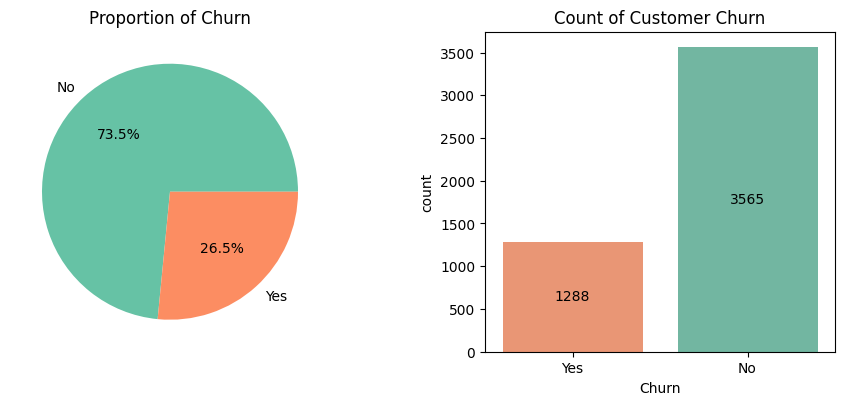

In [23]:
# Color mapping
palette = sns.color_palette('Set2')

color_mapping = {'No': palette[0], 'Yes': palette[1]}


plt.figure(figsize=(14, 4))
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1, wspace=0.4)

# Pie Chart
plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%1.1f%%', colors=[color_mapping[label] for label in df['Churn'].value_counts().index])
plt.title('Proportion of Churn')

# Bar Chart
plt.subplot(1,2,2)
bar_plot = sns.countplot(data=df, x='Churn', palette=color_mapping)
plt.title('Count of Customer Churn')
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')

plt.show()

In [24]:
print('Total Churn')
print(df['Churn'].value_counts())
print()
print('Churn Proportion (%)')
print((df['Churn'].value_counts(normalize=True, )*100).round(2))

Total Churn
Churn
No     3565
Yes    1288
Name: count, dtype: int64

Churn Proportion (%)
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


There are about 26% of data belonging to the minority class, which means the data is mildly imbalanced. To handle this, we will apply a resampling method and evaluate whether it improves the performance of our model.

**Numerical Columns**

In [27]:
# Define numerical and categorical columns

# Numerical columns
num_cols = list(df.select_dtypes(include=['int', 'float']))

# Categorical columns 
cat_cols = list(df.select_dtypes(include='object'))
cat_cols.remove('Churn')

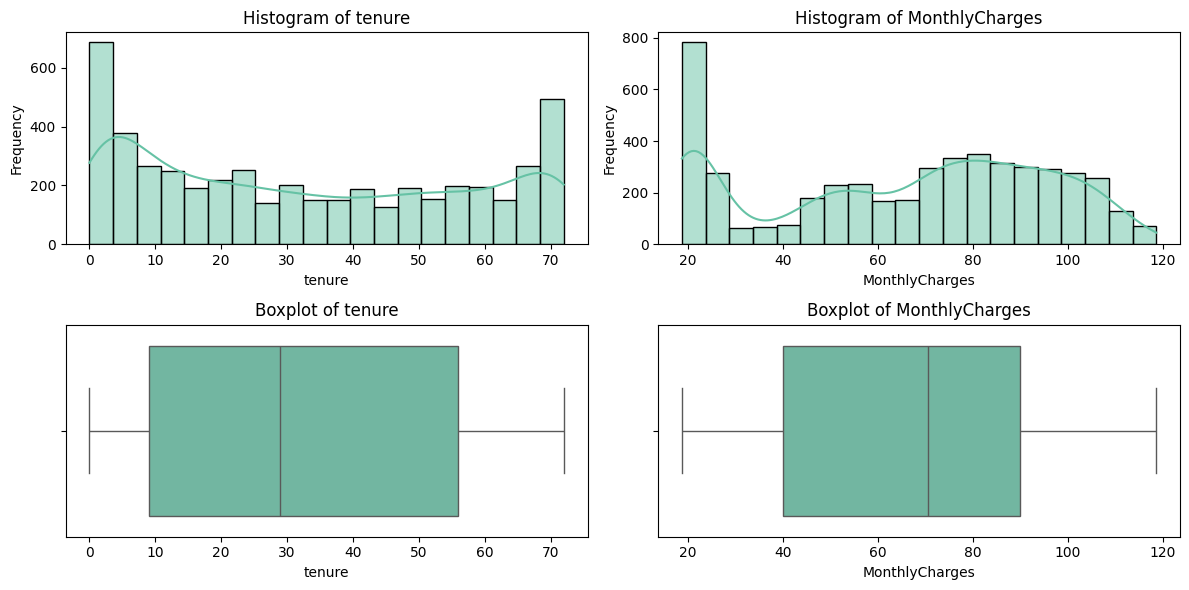

In [28]:
plt.figure(figsize=(12, 6))

for i, column in enumerate(num_cols, 1):
    
    # Histogram
    plt.subplot(2, len(num_cols), i)
    sns.histplot(df[column], kde=True, bins = 20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(2, len(num_cols), i + len(num_cols))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [29]:
# Normality test
from scipy.stats import normaltest
alpha = 0.05    # significance level
normal_test = []

for col in num_cols:
    statistic, p_value = normaltest(df[col])
    if p_value < alpha:
        decision = 'Reject H0'
        distribution = 'Not normally distributed'
    else:
        decision = 'Do not reject H0'
        distribution = 'Normally distributed'
    normal_test.append([col, round(statistic, 3), p_value, decision, distribution])

normal_result = pd.DataFrame(data=normal_test, columns = ['Column', 'Statistic Value', 'P-value', 'Decision', 'Distribution'])
normal_result

,Column,Statistic Value,P-value,Decision,Distribution
0,tenure,54462.345,0.0,Reject H0,Not normally distributed
1,MonthlyCharges,4829.538,0.0,Reject H0,Not normally distributed


Insights:

- There are many customers with short tenures (less than 1 year), indicating that these customers are most likely new customers.
- A significant amount of customers have been with the company for more than 70 months indicating customer loyalty.
- Most customers have low monthly charges, meaning they may not be subscribed to many services of the company.
- Both tenure and MonthlyCharges are not normally distributed based on their histogram and the result of the normality test.
- From the boxplot, there are no outliers for both numerical columns

In [31]:
from scipy.stats import skew

skewness = []
for col in num_cols:
    skewness.append(skew(df[col]))

skew_result = pd.DataFrame({'Column' : num_cols, 'Skewness' : skewness})

In [32]:
skew_result

,Column,Skewness
0,tenure,0.222959
1,MonthlyCharges,-0.243624


In [33]:
df['tenure'].corr(df['MonthlyCharges'])

0.23412564421939505

Next, we will create a pairplot to see the relationship between the numerical features and Churn.

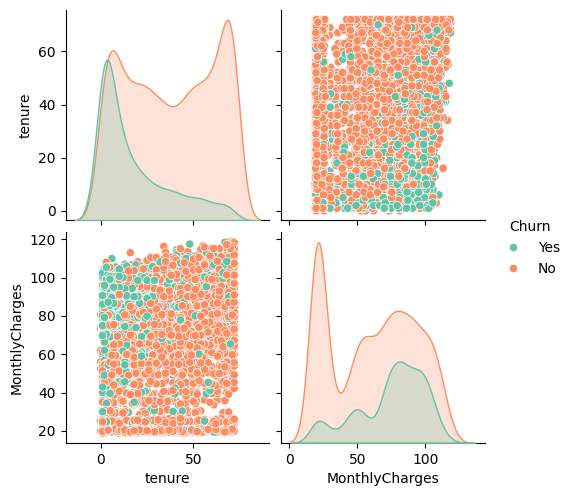

In [35]:
sns.pairplot(df, diag_kind='kde', hue='Churn')
plt.show()

Insights:
- There is a higher amount of customers who churn with shorter tenures compared to those with longer tenures.
- While there is not much difference between short and long tenures for customers that stay, the number of customers who stay with longer tenures are higher.
- Most customers that stays have low monthly charges, while those that churn tend to have higher monthly charges.


**Categorical Columns**

In [38]:
from scipy.stats import chi2_contingency

chi2_results = {}

for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    result = 'Reject H0' if p < 0.05 else 'Accept H0'
    chi2_results[col] = {'Chi2': chi2, 'p-value': p, 'result' : result}

chi2_results_df = pd.DataFrame(chi2_results).T

chi2_results_df.sort_values(by='p-value')

,Chi2,p-value,result
Contract,851.729986,0.0,Reject H0
OnlineSecurity,560.352608,0.0,Reject H0
TechSupport,538.440971,0.0,Reject H0
InternetService,505.302778,0.0,Reject H0
OnlineBackup,425.01908,0.0,Reject H0
DeviceProtection,355.503915,0.0,Reject H0
PaperlessBilling,166.458582,0.0,Reject H0
Dependents,138.497851,0.0,Reject H0


Using the chi-squared test, we examine if the categorical features have an association with the churn column. The result is all our categorical features have an association with the churn column, with the `Contract` feature having the highest chi-squared value.

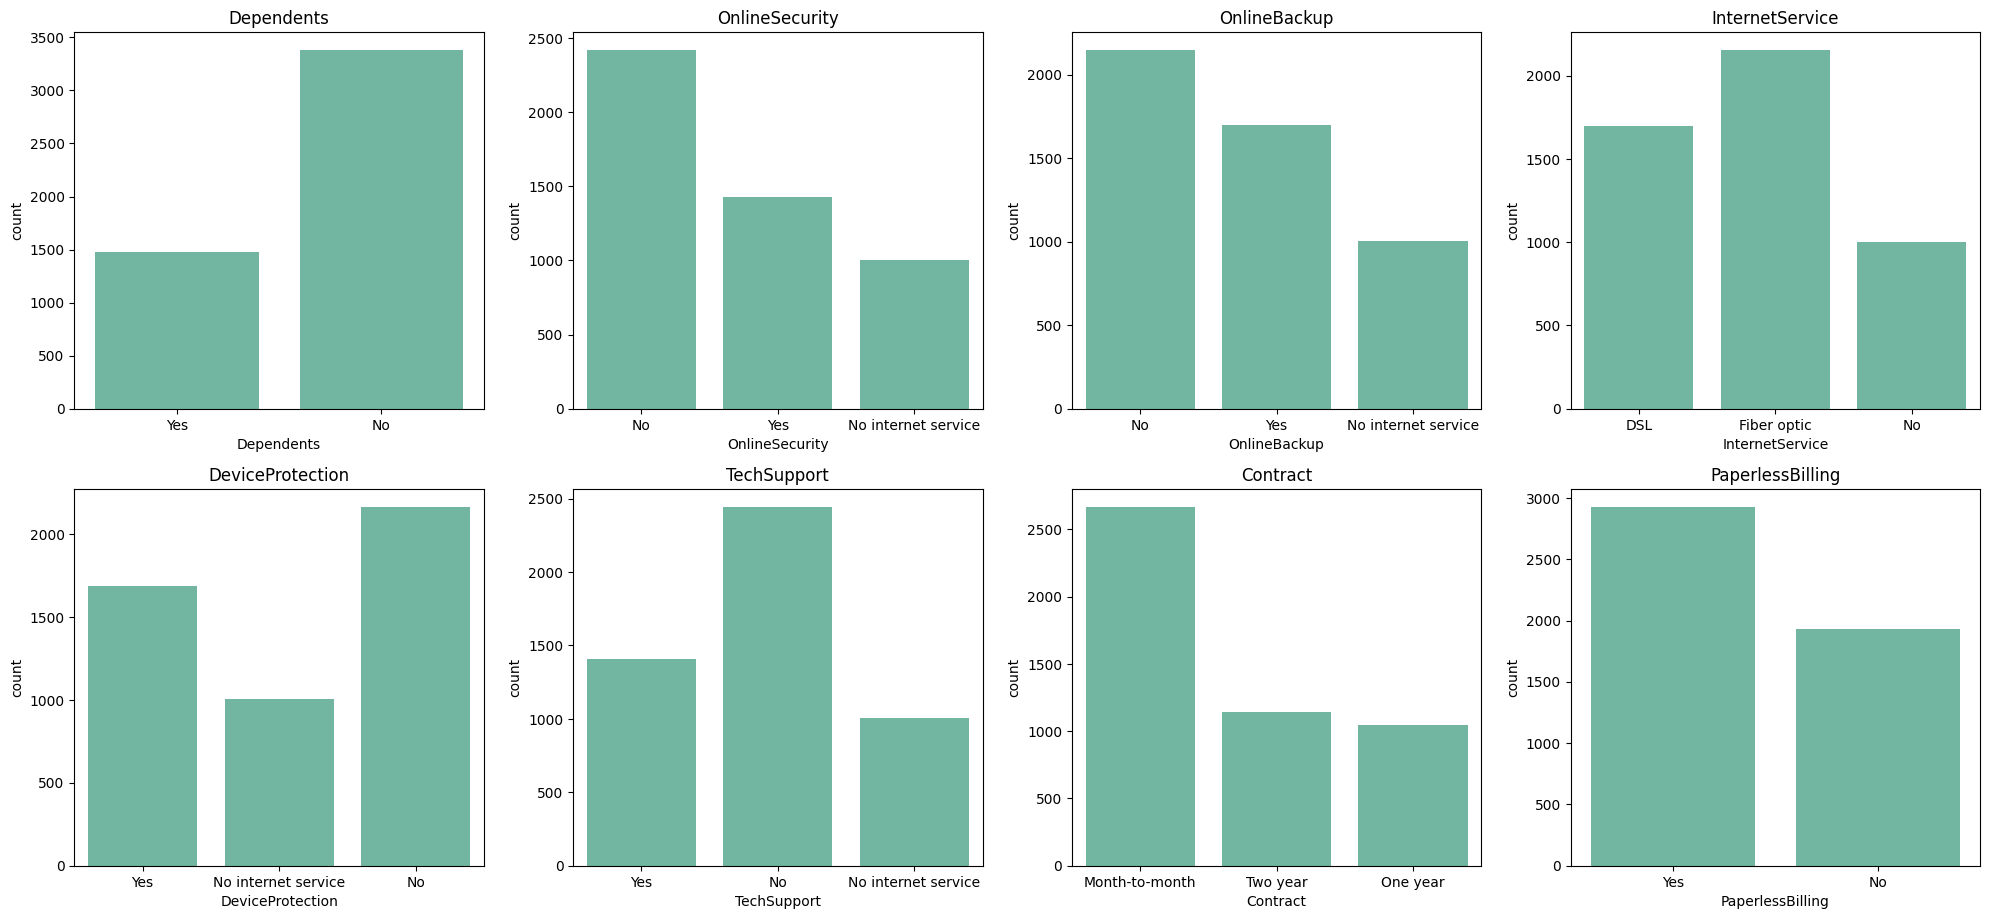

In [40]:
plt.figure(figsize=(20, 18))

for i, column in enumerate(cat_cols, 1):
    
    plt.subplot(len(cat_cols)//2, len(cat_cols)//2, i)
    sns.countplot(data=df, x=column)
    plt.title(f'{column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

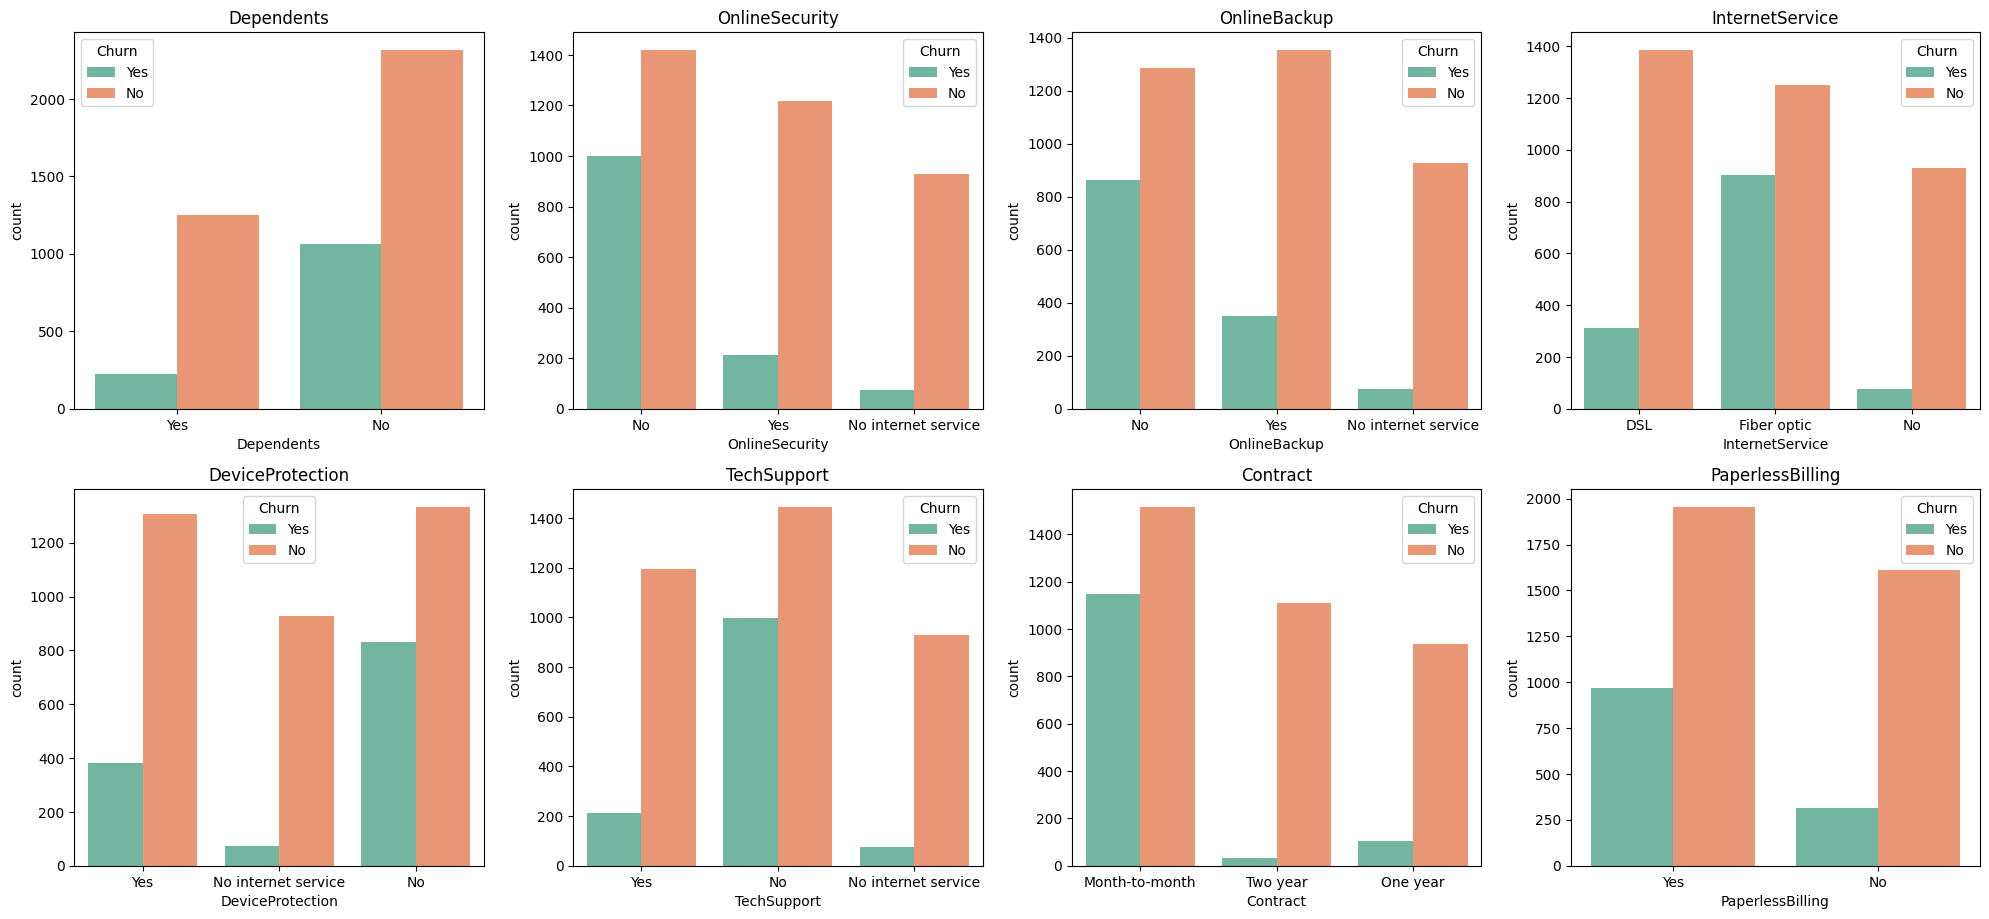

In [41]:
plt.figure(figsize=(20, 18))

for i, column in enumerate(cat_cols, 1):
    
    plt.subplot(len(cat_cols)//2, len(cat_cols)//2, i)
    sns.countplot(data=df, x=column, hue='Churn')
    plt.title(f'{column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

Insights:

- Dependents
    - Those who have no dependents are more likely to churn than those who have dependents

- Internet Service
    - Customers who chose fiber optic are more likely to churn while those with no internet service is less likely to churn. This could mean that there is a problem with the fiber optic service resulting in customer churn.

- Online Security, Online Backup, Device Protection, Tech Support
    - These options are available for the customers who have internet service. The customers that don't have these services tend to churn more than those who does.

- Contract
    - The customers who have month-to-month contract are more likely to churn as they have shorter terms 

- Paperless Billing
    - The customers who chose paperless billing are more likely to churn 

## Data Preprocessing

In [44]:
# Change values in Churn column
df['Churn'] = np.where(df['Churn']=='Yes',1,0)

In [45]:
# Split the data
X = df.drop(columns='Churn')
y = df['Churn']

`OneHotEncoder`

We will use OneHotEncoder for all the categorical features as all the features have low cardinality

`MinMaxScaler`

For our numerical features, we will use MinMaxScaler as there are no outliers and our numerical features are both not normally distributed.

In [47]:
transformer = ColumnTransformer([
    ('onehot' , OneHotEncoder(drop='first'), cat_cols),
    ('scaler', MinMaxScaler(), num_cols)
    ], remainder='passthrough'
)



In [48]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y ,
    stratify=y, 
    test_size=0.2, 
    random_state=10)

In [49]:
# df_test = pd.concat([X_test, y_test], axis=1)
# df_test.to_csv('test_data_original.csv', index = False)

## Modeling

In [51]:
# Set random state
rs = 10

We will compare several classification models to evaluate which models perform the best on our dataset. 

- **Logistic Regression**

    Logistic regression predicts the probability of a class using a linear equation and applies a sigmoid function to model binary or multiclass outcomes.

- **Decision Tree**

    Decision tree works by splitting data into subsets based on the value of input variables.

- **Support Vector Classifier**

    In `scikit-learn` Support Vector Classifier (SVC) is an implementation of Support Vector Machine (SVM) that has the capability to perform classification. SVM works by finding the optimal hyperplane which separates data points to different classes based on their characteristics.


We will also implement **ensemble learning** which combines multiple models which can enhance the overall performance and produce better results. The techniques that will be used in this project are bagging and boosting.

**Bagging**

- **Random Forest**

    Random forest combines multiple decision trees and aggregate their results to reach the final result.

**Boosting**

Boosting is a method of ensemble learning where each base model sequentially learns from the previous model's misclassification error.
- **AdaBoost**
- **Gradient Boosting**
- **XGBoost**
- **LightGBM**

In [53]:
# Models
logreg = LogisticRegression(random_state=rs)
dt = DecisionTreeClassifier(random_state=rs)
rf = RandomForestClassifier(random_state=rs)
ada = AdaBoostClassifier(random_state=rs)
gb = GradientBoostingClassifier(random_state=rs)
xgb = XGBClassifier(random_state=rs)
lgbm = LGBMClassifier(random_state=rs, verbose=-1)
svc = SVC(random_state=rs)

One of our important evaluation metrics is the F2 score, which we will have to create using the `make_scorer` function from scikit-learn using the `fbeta_score` function.

In [55]:
# Create scorer
f2 = make_scorer(fbeta_score, beta=2)

Because our churn data is imbalanced, we will also compare several resampling methods using oversampling and undersampling.

In [57]:
# Resamplers

# Oversampling
ros = RandomOverSampler(random_state=rs)
smote = SMOTE(random_state=rs)
adasyn = ADASYN(random_state=rs)

# Undersampling
rus = RandomUnderSampler(random_state=rs)
ncr = NeighbourhoodCleaningRule()
iht = InstanceHardnessThreshold(random_state=rs)


In [58]:
# Create dictionary for models and resamplers
models = {
    'LogisticRegression' : logreg,
    'DecisionTree' : dt,
    'RandomForest' : rf,
    'AdaBoost' : ada,
    'GradientBoosting' : gb,
    'XGBClassifier' : xgb,
    'LGBMClassifier' : lgbm,
    'SVC' : svc
}

resamplers = {
    'Random Oversampling' : ros,
    'Random Undersampling' : rus,
    'SMOTE' : smote,
    'ADASYN' : adasyn,
    'Neighbourhood Cleaning Rule' : ncr,
    'IHT' : iht
}

### Model Benchmarking: Stratified K-Fold No Resampler

Our first step is to compare our models without using any resampling techniques. In this part, we cross validate our training data using the stratified k-fold method to see how our model performs.

In [61]:
# No Resampler (Cross Validation)

score = []
avg = []
std = []
model_names = []

for mod in models.items():
    model_name = mod[0]
    model = mod[1]

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])

    skfold=StratifiedKFold(n_splits=5)
    model_cv = cross_val_score(
        estimator = pipe_model, 
        X= X_train, 
        y= y_train, 
        cv=skfold, 
        scoring=f2, 
        error_score='raise'
        )

    score.append(model_cv)
    avg.append(model_cv.mean())
    std.append(model_cv.std())
    model_names.append(model_name)

In [62]:
models_train_cv = pd.DataFrame({
    'Model':model_names,
    'F2 Mean CV':avg,
    'std':std
})

models_train_cv

,Model,F2 Mean CV,std
0,LogisticRegression,0.544110,0.015154
1,DecisionTree,0.465338,0.031225
2,RandomForest,0.484127,0.021960
3,AdaBoost,0.537450,0.032579
4,GradientBoosting,0.543665,0.020951
5,XGBClassifier,0.509088,0.028732
6,LGBMClassifier,0.528696,0.016727
7,SVC,0.505876,0.020293


- The result of the cross validation with training data shows that most of the models are not performing well, with the highest F2 score about 0.54 for the Logistic Regression model.
- Decision Tree and Random Forest are the worst performing model as the only ones scoring below 0.5.

### Model Benchmarking: Test Data No Resampler

In [65]:
test_f2 = []
test_model_names = []

for mod in models.items():
    model_name = mod[0]
    model = mod[1]

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])

    # Fit model
    pipe_model.fit(X_train, y_train)
    y_pred_test = pipe_model.predict(X_test)
    f2_test = fbeta_score(y_test, y_pred_test, beta=2)

    test_model_names.append(model_name)
    test_f2.append(f2_test)

In [66]:
models_test = pd.DataFrame({
    'Model':test_model_names,
    'F2 Test Score': test_f2
})

models_test

,Model,F2 Test Score
0,LogisticRegression,0.516963
1,DecisionTree,0.531915
2,RandomForest,0.461224
3,AdaBoost,0.481878
4,GradientBoosting,0.493878
5,XGBClassifier,0.534865
6,LGBMClassifier,0.550239
7,SVC,0.468103


Compare Cross Validation and Test Data

In [68]:
benchmark_models = pd.merge(models_train_cv, models_test)
benchmark_models.sort_values(by='F2 Test Score', ascending = False)

,Model,F2 Mean CV,std,F2 Test Score
6,LGBMClassifier,0.528696,0.016727,0.550239
5,XGBClassifier,0.509088,0.028732,0.534865
1,DecisionTree,0.465338,0.031225,0.531915
0,LogisticRegression,0.544110,0.015154,0.516963
4,GradientBoosting,0.543665,0.020951,0.493878
3,AdaBoost,0.537450,0.032579,0.481878
7,SVC,0.505876,0.020293,0.468103
2,RandomForest,0.484127,0.021960,0.461224


- Decision Tree and XGBoost show an increase from the train cross validation to test score. LGBM scores slightly lower on the score test but overall is stable.
- Most models scored above 0.5 for cross validation, but shows indication of overfitting with lower test scores.
- Random Forest is the only model that scores below 0.5 for both cross validation and test data. So, we will remove this model for our next benchmarking, which will use the resampling method.

### Benchmark Models: Resampling Cross Validation

Next, we will do another comparison for our models using the resampling methods. We will be using various resampling methods for undersampling, oversampling, and the combination of both. 

In [72]:
# Remove models with low performance
remove_keys = ['RandomForest']
for key in remove_keys:
    del models[key]


In [73]:
models

{'LogisticRegression': LogisticRegression(random_state=10),
 'DecisionTree': DecisionTreeClassifier(random_state=10),
 'AdaBoost': AdaBoostClassifier(random_state=10),
 'GradientBoosting': GradientBoostingClassifier(random_state=10),
 'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, rand

In [74]:
# Resampling cross validation
resampled_score = []
resampled_avg = []
resampled_std = []
resampled_names = []

for mod in models.items():
    for res in resamplers.items():
        model_name = mod[0]
        model = mod[1]

        resampler_name = res[0]
        resampler = res[1]

        pipe_model = Pipeline([
            ('transformer', transformer),
            ('resampler', resampler),
            ('model', model)
        ])

        skfold=StratifiedKFold(n_splits=5)
        model_cv = cross_val_score(
            estimator = pipe_model, 
            X= X_train,
            y= y_train, 
            cv=skfold, 
            scoring=f2, 
            error_score='raise'
            )

        res_name = f'{model_name} - {resampler_name}'
        resampled_score.append(model_cv.round(4))
        resampled_avg.append(model_cv.mean())
        resampled_std.append(model_cv.std())
        resampled_names.append(res_name)

In [75]:
resampled_train_cv = pd.DataFrame({
    'Model': resampled_names,
    'F2 Mean CV': resampled_avg,
    'Std': resampled_std
})

resampled_train_cv.sort_values(by='F2 Mean CV', ascending = False).head()

,Model,F2 Mean CV,Std
17,AdaBoost - IHT,0.742557,0.016707
23,GradientBoosting - IHT,0.739627,0.018002
35,LGBMClassifier - IHT,0.738687,0.014391
5,LogisticRegression - IHT,0.737908,0.014875
15,AdaBoost - ADASYN,0.737626,0.018491


From the cross validation results, the top performing models are the ones that use the IHT method for resampling. We will compare the results with the train and test data.

### Benchmark Models: Resampling Test & Train Data

**Train Data**

Next, we want to see how our model performs on our train data without using cross validation to compare the stability of the models.

In [79]:
resampled_names = []
resampled_f2_train = []

for mod in models.items():
    for res in resamplers.items():
        model_name = mod[0]
        model = mod[1]

        resampler_name = res[0]
        resampler = res[1]

        res_name = f'{model_name} - {resampler_name}'
        
        # Model pipeline
        pipe_model = Pipeline([
            ('transformer', transformer),
            ('resampler', resampler),
            ('model', model)
        ])

        # Fit model
        pipe_model.fit(X_train, y_train)
        
        # Predict
        y_pred_train = pipe_model.predict(X_train)

        # Evaluate Model
        f2_test = fbeta_score(y_train, y_pred_train, beta=2)

        resampled_names.append(res_name)
        resampled_f2_train.append(f2_test)

In [80]:
resampled_train = pd.DataFrame({
    'Model' : resampled_names, 
    'F2 Score Train' : resampled_f2_train,
})

print("Train score result")

resampled_train.sort_values(by='F2 Score Train', ascending = False).head()

Train score result


,Model,F2 Score Train
6,DecisionTree - Random Oversampling,0.992448
9,DecisionTree - ADASYN,0.981272
8,DecisionTree - SMOTE,0.981272
24,XGBClassifier - Random Oversampling,0.909928
7,DecisionTree - Random Undersampling,0.893107


**Test Data**

In this section, we will compare how each models paired with each resampling methods fare on our test data. While our focus is on the F2 score, we will also consider other metrics such as recall, and ROC AUC as Recall is great at minimizing False Negatives and ROC AUC describes model performance better than Accuracy in the case of imbalanced data.

In [83]:
resampled_names = []
resampled_f2_test = []
resampled_recall_test = []
resampled_roc_auc_test = []
resampled_precision_test = []
resampled_accuracy_test = []

for mod in models.items():
    for res in resamplers.items():
        model_name = mod[0]
        model = mod[1]

        resampler_name = res[0]
        resampler = res[1]

        res_name = f'{model_name} - {resampler_name}'

        # Model pipeline
        pipe_model = Pipeline([
            ('transformer', transformer),
            ('resampler', resampler),
            ('model', model)
        ])

        # Fit model
        pipe_model.fit(X_train, y_train)

        y_pred_test = pipe_model.predict(X_test)

        # Use predict_proba if available, otherwise decision_function
        if hasattr(pipe_model, 'predict_proba'):
            y_pred_proba_test = pipe_model.predict_proba(X_test)[:, 1]
        elif hasattr(pipe_model, 'decision_function'):
            y_pred_proba_test = pipe_model.decision_function(X_test)
        else:
            raise AttributeError("The model does not support probability prediction or decision scores.")

        # Evaluate Model
        f2_test = fbeta_score(y_test, y_pred_test, beta=2)
        recall_test = recall_score(y_test, y_pred_test)
        roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
        precision_test = precision_score(y_test, y_pred_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        # Append values to lists
        resampled_names.append(res_name)
        resampled_f2_test.append(f2_test)
        resampled_recall_test.append(recall_test)
        resampled_roc_auc_test.append(roc_auc_test)
        resampled_precision_test.append(precision_test)
        resampled_accuracy_test.append(accuracy_test)

In [84]:
resampled_test = pd.DataFrame({
    'Model' : resampled_names, 
    'F2 Test' : resampled_f2_test,
    'Recall Test' : resampled_recall_test,
    'ROC AUC Test' : resampled_roc_auc_test,
    'Precision Test' : resampled_precision_test,
    'Accuracy Test' : resampled_accuracy_test
})

resampled_test

,Model,F2 Test,Recall Test,ROC AUC Test,Precision Test,Accuracy Test
0,LogisticRegression - Random Oversampling,0.705351,0.786822,0.833956,0.498771,0.733265
1,LogisticRegression - Random Undersampling,0.710784,0.786822,0.834668,0.512626,0.744593
2,LogisticRegression - SMOTE,0.709768,0.782946,0.834913,0.516624,0.747683
3,LogisticRegression - ADASYN,0.714774,0.810078,0.832825,0.486047,0.721936
4,LogisticRegression - Neighbourhood Cleaning Rule,0.698086,0.763566,0.834510,0.519789,0.749743
5,LogisticRegression - IHT,0.741445,0.906977,0.833608,0.428571,0.653965
6,DecisionTree - Random Oversampling,0.466461,0.468992,0.633264,0.456604,0.710608
7,DecisionTree - Random Undersampling,0.628019,0.705426,0.690102,0.436451,0.679712
8,DecisionTree - SMOTE,0.545723,0.573643,0.663101,0.456790,0.705458
9,DecisionTree - ADASYN,0.584604,0.624031,0.687033,0.466667,0.710608


- The result of the models' performance on the test data with resampling shows higher F2 score than without resampling. This means resampling is effective in improving our model's performance.
- There are many models with F2 score above 0.7, so we will limit the models to those above 0.7 to compare our models before choosing our final model.
- Recall score, while not our primary metric, is still closely related to the F2 score, so it will be considered when choosing our final model. There is high variance in recall score ranging from around 0.4 to 0.9. As recall is also an important metric to minimize false negatives, we want a higher score for recall so we will limit to models that scored above 0.8.
- The ROC AUC score shows how well our models' performance is at distinguishing the different classes. Most of the models scored above 0.8 so we will remove those that scored below it.

### Comparison of Benchmark Models with Resampling

In [123]:
model_result = pd.merge(resampled_train_cv, resampled_train).merge(resampled_test)

In [124]:
model_result = pd.merge(resampled_train_cv, resampled_train).merge(resampled_test)

In [125]:
model_result = pd.merge(resampled_train_cv, resampled_train).merge(resampled_test)

In [126]:
model_result.head()

,Model,F2 Mean CV,Std,F2 Score Train,F2 Test,Recall Test,ROC AUC Test,Precision Test,Accuracy Test
0,LogisticRegression - Random Oversampling,0.712490,0.026301,0.727826,0.705351,0.786822,0.833956,0.498771,0.733265
1,LogisticRegression - Random Undersampling,0.716051,0.029983,0.718411,0.710784,0.786822,0.834668,0.512626,0.744593
2,LogisticRegression - SMOTE,0.715391,0.029277,0.713534,0.709768,0.782946,0.834913,0.516624,0.747683
3,LogisticRegression - ADASYN,0.726573,0.021643,0.736023,0.714774,0.810078,0.832825,0.486047,0.721936
4,LogisticRegression - Neighbourhood Cleaning Rule,0.705050,0.021831,0.712389,0.698086,0.763566,0.834510,0.519789,0.749743


In [127]:
# Remove models based on previous conditions
model_result = model_result[(model_result['F2 Test'] >= 0.7) & (model_result['Recall Test'] >= 0.8) & (model_result['ROC AUC Test'] >= 0.8)]

In [128]:
model_result.shape

(12, 9)

After removing models with low F2, Recall, and ROC AUC scores on the test data, we will choose the best performing models to compare by performing hyperparameter tuning before choosing our final model. We will compare the stability of the F2 Score from cross validation, training set, and test set. We will see if any model performs better on test set and also look at the values of the other metrics.

In [129]:
# Calculate the difference between train and test set
model_result['diff'] = abs(model_result['F2 Test'] - model_result['F2 Score Train'])
diff = model_result.pop('diff')
model_result.insert(5, 'Difference', diff)

In [130]:
model_result

,Model,F2 Mean CV,Std,F2 Score Train,F2 Test,Difference,Recall Test,ROC AUC Test,Precision Test,Accuracy Test
3,LogisticRegression - ADASYN,0.726573,0.021643,0.736023,0.714774,0.021249,0.810078,0.832825,0.486047,0.721936
5,LogisticRegression - IHT,0.737908,0.014875,0.742943,0.741445,0.001498,0.906977,0.833608,0.428571,0.653965
12,AdaBoost - Random Oversampling,0.724819,0.026321,0.743665,0.714774,0.028891,0.810078,0.833945,0.486047,0.721936
13,AdaBoost - Random Undersampling,0.723075,0.013743,0.743701,0.712319,0.031382,0.802326,0.839411,0.491686,0.727085
15,AdaBoost - ADASYN,0.737626,0.018491,0.744644,0.728883,0.015761,0.829457,0.835676,0.490826,0.726056
16,AdaBoost - Neighbourhood Cleaning Rule,0.722632,0.015361,0.737576,0.717241,0.020335,0.806202,0.835448,0.497608,0.732235
17,AdaBoost - IHT,0.742557,0.016707,0.749766,0.759179,0.009413,0.945736,0.836155,0.424348,0.644696
21,GradientBoosting - ADASYN,0.707560,0.020026,0.748550,0.715268,0.033282,0.806202,0.836353,0.492891,0.728115
23,GradientBoosting - IHT,0.739627,0.018002,0.765844,0.758145,0.007698,0.937984,0.827036,0.429078,0.651905
29,XGBClassifier - IHT,0.733161,0.016457,0.802556,0.755597,0.046959,0.941860,0.816389,0.421875,0.641607


After calculating the difference between our train and test scores, we will further filter our models based on these conditions:
- Difference is not more than 0.03 

In [131]:
model_result = model_result[(model_result['Difference'] < 0.03)]

In [132]:
model_result.sort_values(by='F2 Test', ascending=False)

,Model,F2 Mean CV,Std,F2 Score Train,F2 Test,Difference,Recall Test,ROC AUC Test,Precision Test,Accuracy Test
17,AdaBoost - IHT,0.742557,0.016707,0.749766,0.759179,0.009413,0.945736,0.836155,0.424348,0.644696
23,GradientBoosting - IHT,0.739627,0.018002,0.765844,0.758145,0.007698,0.937984,0.827036,0.429078,0.651905
5,LogisticRegression - IHT,0.737908,0.014875,0.742943,0.741445,0.001498,0.906977,0.833608,0.428571,0.653965
41,SVC - IHT,0.734287,0.023992,0.747189,0.740050,0.007140,0.922481,0.810966,0.413194,0.631308
15,AdaBoost - ADASYN,0.737626,0.018491,0.744644,0.728883,0.015761,0.829457,0.835676,0.490826,0.726056
16,AdaBoost - Neighbourhood Cleaning Rule,0.722632,0.015361,0.737576,0.717241,0.020335,0.806202,0.835448,0.497608,0.732235
3,LogisticRegression - ADASYN,0.726573,0.021643,0.736023,0.714774,0.021249,0.810078,0.832825,0.486047,0.721936
12,AdaBoost - Random Oversampling,0.724819,0.026321,0.743665,0.714774,0.028891,0.810078,0.833945,0.486047,0.721936


First, we sort the models based on the lowest standard deviation of the cross validation models to see how stable the models were during the process. Next, we want to look at how the F2 score differs between the cross-validation set, train set, and test sets. The difference calculated is the F2 score for the train and test set. The top 3 models based on the standard deviation have stable score across the different sets. They also have high Recall and ROC AUC score meaning the models are able to minimize False Negatives and also have great performance to differentiate the classes.

**Final Benchmark Models**

- AdaBoost with IHT
    - Standard Deviation of Cross Validation below 0.02
    - Increased F2 score after testing (+ 0.09)
    - High recall = 0.95
    - ROC AUC = 0.84
- GradientBoost with IHT
    - Standard Deviation of Cross Validation below 0.02
    - Slight decrease in F2 score after testing (- 0.08)
    - High recall = 0.94
    - ROC AUC = 0.83
- Logistic Regression with IHT
    - Standard Deviation of Cross Validation below 0.02
    - Slight decrease in F2 score after testing (- 0.01)
    - High recall but lowest compared to the previous models = 0.91
    - ROC AUC = 0.83

## Hyperparameter Tuning

### AdaBoost Hyperparameter Tuning

For the AdaBoost model, there are 3 parameters that can be tuned:

`learning rate`

The weight applied to each model at each boosting stage. Higher learning rate increases the he contribution of each classifier. 

`n_estimators`

The maximum number of models before boosting is terminated.

`algorithm`

The algorithm used in AdaBoost.

In [104]:
rs_tuning = 5


- Hyperparameter Tuning

In [106]:
np.random.seed(rs_tuning)
# Learning rate
learning_rate = list(np.arange(0.01, 1, 100))

# Number of weak learners (trees)
n_estimators = list(range(50, 500, 50))

# Boosting algorithm
algorithm = ['SAMME', 'SAMME.R']

# Parameter grid
hyperparam_space_ada = {
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__algorithm':algorithm,
}

**AdaBoost with Instance Hardness Threshold (IHT)**

- Model Test Performance without Tuning

In [109]:
ada_iht = Pipeline([
            ('prep', transformer), 
            ('resample', iht),
            ('model', ada)
        ])

# Fitting
ada_iht.fit(X_train, y_train)

# Predict
y_pred_ada = ada_iht.predict(X_test)

f2_score_ada = fbeta_score(y_test, y_pred_ada, beta = 2)

print(f'F2 Score: {f2_score_ada:.4f}')

F2 Score: 0.7592


In [110]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.96      0.54      0.69       713
           1       0.42      0.95      0.59       258

    accuracy                           0.64       971
   macro avg       0.69      0.74      0.64       971
weighted avg       0.82      0.64      0.66       971



- Tuned Model

In [112]:
# Model pipeline
ada_iht_pipe = Pipeline([
    ('prep', transformer), 
    ('resample', iht),
    ('model', ada)
])

# Import K-fold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)

# Hyperparameter Tuning
random_ada = RandomizedSearchCV(
    estimator = ada_iht_pipe,
    param_distributions = hyperparam_space_ada,
    scoring = f2,
    cv = skfold,
    n_jobs = -1,
    random_state = rs_tuning
)

random_ada.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'InternetService',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'Contract',
                                                                                'PaperlessBilling']),
                                                                              ('scaler',
                                                                               MinM...
                                                                                'MonthlyCharges'])])),
                                             ('resample',
                                              InstanceHardnessThreshold(random_state=10)),
                                             ('model',
                                              AdaBoostClassifier(random_state=10))]),
                   n_jobs=-1,
                   param_distributions={'model__algorithm': ['SAMME',
                                                             'SAMME.R'],
                                        'model__learning_rate': [0.01],
                                        'model__n_estimators': [50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400,
                                                                450]},
                   random_state=5,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [113]:
# Best train score
f2_train_ada = random_ada.best_score_

# Best score
print(f'F2 Score on Train Set: {f2_train_ada:.4f}')

# Best parameter
print(f'Best Parameter: {random_ada.best_params_}')

F2 Score on Train Set: 0.7446
Best Parameter: {'model__n_estimators': 450, 'model__learning_rate': 0.01, 'model__algorithm': 'SAMME.R'}


- Tuned Model Performance on Test Set

In [115]:
# Model after hyperparameter tuning
ada_iht_tuned = random_ada.best_estimator_
ada_iht_tuned.fit(X_train, y_train)

# Predict 
y_test_adaiht = ada_iht_tuned.predict(X_test)

# Evaluate f2 score
f2_adaiht_tuned = fbeta_score(y_test, y_test_adaiht, beta=2)

print(f'F2 Score on Test Set: {f2_adaiht_tuned:.4f}')


F2 Score on Test Set: 0.7548


In [116]:
print(classification_report(y_test, y_test_adaiht))

              precision    recall  f1-score   support

           0       0.97      0.51      0.67       713
           1       0.41      0.95      0.58       258

    accuracy                           0.63       971
   macro avg       0.69      0.73      0.62       971
weighted avg       0.82      0.63      0.65       971



### GradientBoosting Hyperparameter Tuning

For the GradientBoosting model, there are 2 types of parameters that can be tuned. One type is tree specific parameters that affect each individual tree in the model. The other type is boosting specific parameters that affect the boosting operation in the model.

**Boosting**

`learning_rate` 

Learning rate controls the impact of each weak learners by adjusting the shrinkage. Lower values (closer to 0) reduce the contribution of weak learner, but in turn the strong learner will be better, reducing ovefitting.

`n_estimators`

Number of boosting stages to perform or trees to build.

`subsample`

The fraction of samples to be used for fitting the individual base learners

**Tree-specific**

`min_samples_split`

Minimum number of samples to split an internal mode


`min_samples_leaf` 

Minimum number of samples required to be at leaf node

`max_depth `

Maximum depth of a tree

`max_features`

Number of features to consider while searching for a best split.





In [119]:
np.random.seed(rs_tuning)
# Boosting parameters
# Learning rate
learning_rate = list(np.arange(0.01, 1, 100))

# Number of weak learners (trees)
n_estimators = list(range(50, 500, 50))

# Subsample
subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Tree specific parameters
# Min samples split
min_samples_split = list(range(2, 20))

# Min samples leaf
min_samples_leaf = list(range(1, 10))

# Max depth
max_depth = list(range(3, 20, 2))

# Max features
max_features = [None, 'sqrt', 'log2', 5, 10]

# Parameter grid
hyperparam_space_gb = {
    'model__learning_rate' : learning_rate,
    'model__n_estimators' : n_estimators,
    'model__subsample' : subsample,
    'model__min_samples_split' : min_samples_split,
    'model__min_samples_leaf' : min_samples_leaf,
    'model__max_depth' : max_depth,
    'model__max_features' : max_features
}

- Model Test Performance without Tuning

In [121]:
gb_iht = Pipeline([
            ('prep', transformer), 
            ('resample', iht),
            ('model', gb)
        ])

# Fitting
gb_iht.fit(X_train, y_train)

# Predict
y_pred_gb = gb_iht.predict(X_test)

f2_score_gb = fbeta_score(y_test, y_pred_gb, beta = 2)

print(f'F2 Score: {f2_score_gb:.4f}')

F2 Score: 0.7581


In [122]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70       713
           1       0.43      0.94      0.59       258

    accuracy                           0.65       971
   macro avg       0.69      0.74      0.64       971
weighted avg       0.82      0.65      0.67       971



- Tuned Model

In [124]:
# Model pipeline
gb_iht_pipe = Pipeline([
            ('prep', transformer), 
            ('resample', iht),
            ('model', gb)
        ])

# Import K-fold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)

# Hyperparameter Tuning
random_gb = RandomizedSearchCV(
    estimator = gb_iht_pipe,
    param_distributions = hyperparam_space_gb,
    scoring = f2,
    cv = skfold,
    n_jobs = -1,
    random_state = rs_tuning
)

random_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'InternetService',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'Contract',
                                                                                'PaperlessBilling']),
                                                                              ('scaler',
                                                                               MinM...
                                        'model__max_features': [None, 'sqrt',
                                                                'log2', 5, 10],
                                        'model__min_samples_leaf': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19],
                                        'model__n_estimators': [50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400, 450],
                                        'model__subsample': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1]},
                   random_state=5,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [125]:
# Best train score
f2_train_gbiht = random_gb.best_score_

# Best score
print(f'F2 Score on Train Set: {f2_train_gbiht:.4f}')

# Best parameter
print(f'Best Parameter: {random_gb.best_params_}')


F2 Score on Train Set: 0.7421
Best Parameter: {'model__subsample': 0.7, 'model__n_estimators': 450, 'model__min_samples_split': 15, 'model__min_samples_leaf': 8, 'model__max_features': 5, 'model__max_depth': 3, 'model__learning_rate': 0.01}


In [126]:
random_gb.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])])),
                ('resample', InstanceHardnessThreshold(random_state=10)),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01, max_features=5,
                                            min_samples_leaf=8,
                                            min_samples_split=15,
                                            n_estimators=450, random_state=10,
                                            subsample=0.7))])

- Tuned Model Performance on Test Set

In [128]:
# Model after hyperparameter tuning

gb_iht_tuned = random_gb.best_estimator_
gb_iht_tuned.fit(X_train, y_train)

# Predict 
y_test_gbiht = gb_iht_tuned.predict(X_test)

# Evaluate f2 score
f2_gbiht_tuned = fbeta_score(y_test, y_test_gbiht, beta=2)

print(f'F2 Score on Test Set: {f2_gbiht_tuned:.4f}')


F2 Score on Test Set: 0.7613


In [129]:
print(classification_report(y_test, y_test_gbiht))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70       713
           1       0.43      0.94      0.59       258

    accuracy                           0.65       971
   macro avg       0.70      0.75      0.65       971
weighted avg       0.82      0.65      0.67       971



### Logistic Regression Hyperparameter Tuning

For the logistic regression model, the parameter grid are as follows:

`penalty`

Specifies the type of regularization to use:
- `l1`: Lasso regression (feature selection).
- `l2`: Ridge regression.
- `elasticnet`: Combination of Lasso and Ridge.
- `None`: No regularization.

`C`

Controls the strength of regularization. Requires positive float. <br>
Smaller values of C indicate stronger regularization, while larger values indicate the opposite.

`solver`

Algorithm used in the optimization problem

`max_iter`

Maximum number of iterations taken for the solvers to converge. Default is 100




- Hyperparameter Tuning

In [133]:
np.random.seed(rs_tuning)
# Penalty
penalty = ['l1', 'l2', 'elasticnet', None]

# C
c = list(np.logspace(-4, 4, 50))

# Solver
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

# Max iterations
max_iter = list(np.arange(100, 500, 50))

# Parameter grid
hyperparam_space_logreg = {
    'model__penalty': penalty,
    'model__C'  : c,
    'model__solver' : solver,
    'model__max_iter' : max_iter
}

**Logistic Regression with IHT**

- Model Test Performance without Tuning

In [136]:
lr_iht = Pipeline([
            ('prep', transformer), 
            ('resample', iht),
            ('model', logreg)
        ])

# Fitting
lr_iht.fit(X_train, y_train)

# Predict
y_pred_lriht = lr_iht.predict(X_test)

f2_score_lriht = fbeta_score(y_test, y_pred_lriht, beta = 2)

print(f'F2 Score: {f2_score_lriht:.4f}')

F2 Score: 0.7414


In [137]:
print(classification_report(y_test, y_pred_lriht))

              precision    recall  f1-score   support

           0       0.94      0.56      0.70       713
           1       0.43      0.91      0.58       258

    accuracy                           0.65       971
   macro avg       0.69      0.73      0.64       971
weighted avg       0.81      0.65      0.67       971



- Tuned Model

In [139]:
# Model pipeline
lr_iht_pipe = Pipeline([
    ('prep', transformer), 
    ('resample', iht),
    ('model', logreg)
])

# Import K-fold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)

# Hyperparameter Tuning
random_lr_iht = RandomizedSearchCV(
    estimator = lr_iht_pipe,
    param_distributions = hyperparam_space_logreg,
    scoring = f2,
    cv = skfold,
    n_jobs = -1,
    random_state = rs_tuning
)

random_lr_iht.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'InternetService',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'Contract',
                                                                                'PaperlessBilling']),
                                                                              ('scaler',
                                                                               MinM...
                                                     1.2067926406393288,
                                                     1.7575106248547894,
                                                     2.559547922699533,
                                                     3.727593720314938,
                                                     5.428675439323859, ...],
                                        'model__max_iter': [100, 150, 200, 250,
                                                            300, 350, 400,
                                                            450],
                                        'model__penalty': ['l1', 'l2',
                                                           'elasticnet', None],
                                        'model__solver': ['lbfgs', 'liblinear',
                                                          'newton-cg',
                                                          'newton-cholesky',
                                                          'sag', 'saga']},
                   random_state=5,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [140]:
# Best train score
f2_train_lriht = random_lr_iht.best_score_

# Best score
print(f'F2 Score on Train Set: {f2_train_lriht:.4f}')

# Best parameter
print(f'Best Parameter: {random_lr_iht.best_params_}')

F2 Score on Train Set: 0.7335
Best Parameter: {'model__solver': 'newton-cg', 'model__penalty': None, 'model__max_iter': 400, 'model__C': 0.00030888435964774815}


- Tuned Model Performance on Test Set

In [142]:
# Model after hyperparameter tuning
lr_iht_tuned = random_lr_iht.best_estimator_
lr_iht_tuned.fit(X_train, y_train)

# Predict 
y_test_lriht = lr_iht_tuned.predict(X_test)

# Evaluate f2 score 
f2_lriht_tuned = fbeta_score(y_test, y_test_lriht, beta=2)

print(f'F2 Score on Test Set: {f2_lriht_tuned:.4f}')


F2 Score on Test Set: 0.7516


In [143]:
print(classification_report(y_test, y_test_lriht))

              precision    recall  f1-score   support

           0       0.95      0.55      0.70       713
           1       0.43      0.93      0.59       258

    accuracy                           0.65       971
   macro avg       0.69      0.74      0.64       971
weighted avg       0.81      0.65      0.67       971



### Model Hyperparameter Tuning Comparison

In [145]:
tuned_models = ['AdaBoost-IHT', 'GradientBoost-IHT', 'LogisticRegression-IHT']
f2_before_tuned = [f2_score_ada, f2_score_gb, f2_score_lriht]
f2_train_tuned = [f2_train_ada, f2_train_gbiht, f2_train_lriht]
f2_test_tuned = [f2_adaiht_tuned, f2_gbiht_tuned, f2_lriht_tuned]

benchmark_tuned = pd.DataFrame({
    'Model' : tuned_models,
    'F2 Test Before Tuning' : f2_before_tuned,
    'F2 Train After Tuning' : f2_train_tuned,
    'F2 Test After Tuning' : f2_test_tuned
})

benchmark_tuned

,Model,F2 Test Before Tuning,F2 Train After Tuning,F2 Test After Tuning
0,AdaBoost-IHT,0.759179,0.744587,0.754775
1,GradientBoost-IHT,0.758145,0.742051,0.761278
2,LogisticRegression-IHT,0.741445,0.733514,0.751572


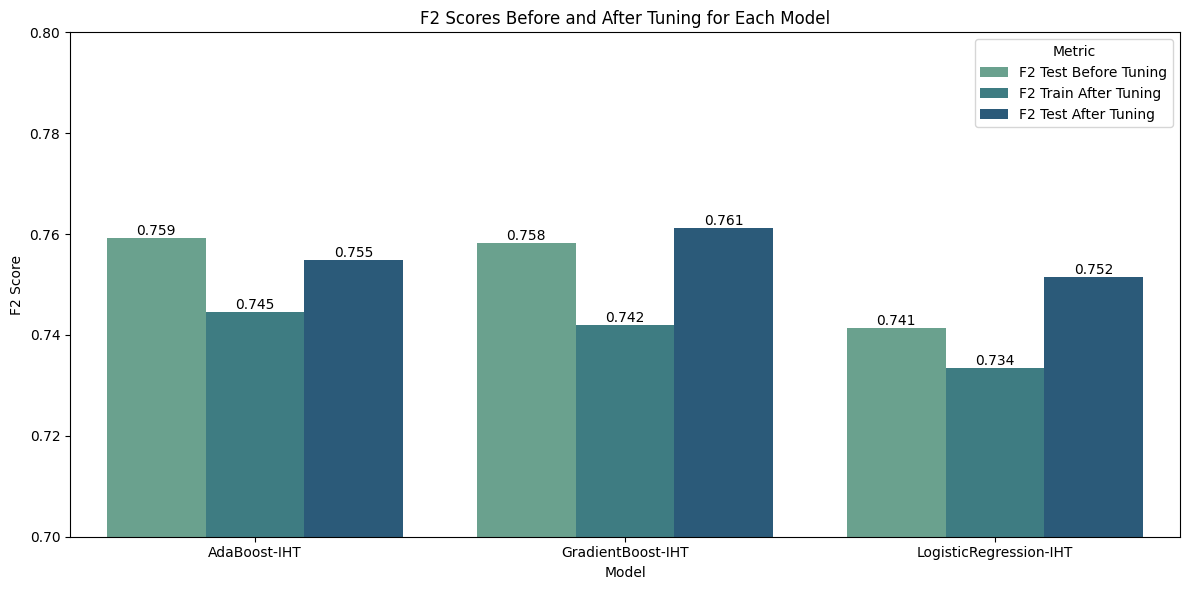

In [146]:
benchmark_melted = benchmark_tuned.melt(id_vars='Model', 
                                         value_vars=['F2 Test Before Tuning', 'F2 Train After Tuning', 'F2 Test After Tuning'],
                                         var_name='Metric', 
                                         value_name='Score')


plt.figure(figsize=(12, 6))
ax = sns.barplot(data=benchmark_melted, x='Model', y='Score', hue='Metric', palette='crest')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='{:.3f}')

plt.title('F2 Scores Before and After Tuning for Each Model')
plt.xlabel('Model')
plt.ylabel('F2 Score')
plt.ylim(0.7, 0.8)

plt.tight_layout()
plt.show()

**Insights**

- For AdaBoost and Gradient Boosting, there is an increase in test score after hyperparameter tuning while is a slight decrease in score for Logistic Regression.
- When performing hyperparameter tuning, all models show higher F2 score on test data compared to train data which indicates our models are not overfitting.
- The best model with the highest F2 score is the Gradient Boosting, with a score of **0.761** after tuning. Therefore, we will choose this model as our best model.

## Best Model Analysis



Best Model: Gradient Boosting with Instance Hardness Threshold and Hyperparameter Tuning

In [150]:
def classification_metrics(y_test, y_pred, y_pred_proba):
    f2_test = fbeta_score(y_test, y_pred, beta=2)
    recall_test = recall_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba)

    return f2_test, recall_test, roc_auc_test

### Best Model Result

In [152]:
best_model = gb_iht_tuned
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

f2_test, recall_test, roc_auc_test = classification_metrics(y_test, y_pred_best, y_pred_proba_best)

print('F2 Score:', f2_test)
print('Recall Score:', recall_test)
print('ROC AUC Score:', roc_auc_test)
print(classification_report(y_test, y_pred_best))

F2 Score: 0.7612781954887218
Recall Score: 0.9418604651162791
ROC AUC Score: 0.8397180816943366
              precision    recall  f1-score   support

           0       0.96      0.55      0.70       713
           1       0.43      0.94      0.59       258

    accuracy                           0.65       971
   macro avg       0.70      0.75      0.65       971
weighted avg       0.82      0.65      0.67       971



**Best Model Insights**
- F2 Score of 76.1 shows that our model performs well in minimizing the False Negatives, which is corroborated by the high Recall score of 94.
- The ROC AUC score is 84, meaning our model does well to distinguish between positive and negative classes.


### Optimized Threshold

The default threshold for a classification model is 0.5. In this part, we will try to find the optimized threshold value that maximizes our F2 score.

In [155]:
best_model = gb_iht_tuned
best_model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

list_threshold = np.arange(0.01, 1.00, 0.01)
score_list = []

for threshold in list_threshold:
    # Predict
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]       
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)      

    # F2 score
    score_list.append(fbeta_score(y_test, y_pred_class, beta=2)) 

In [156]:
threshold_df = pd.DataFrame({
    'Threshold' : list_threshold,
    'F2 Score' : score_list
})

In [157]:
threshold_df.sort_values(by='F2 Score', ascending = False).head(10)

,Threshold,F2 Score
50,0.51,0.762233
49,0.50,0.761278
57,0.58,0.760870
51,0.52,0.760732
44,0.45,0.760668
47,0.48,0.760125
46,0.47,0.759926
43,0.44,0.759728
59,0.60,0.759615
56,0.57,0.759413


From the process of finding the optimized threshold, the best threshold is **0.50** which means the default threshold is the best threshold.

### Confusion Matrix


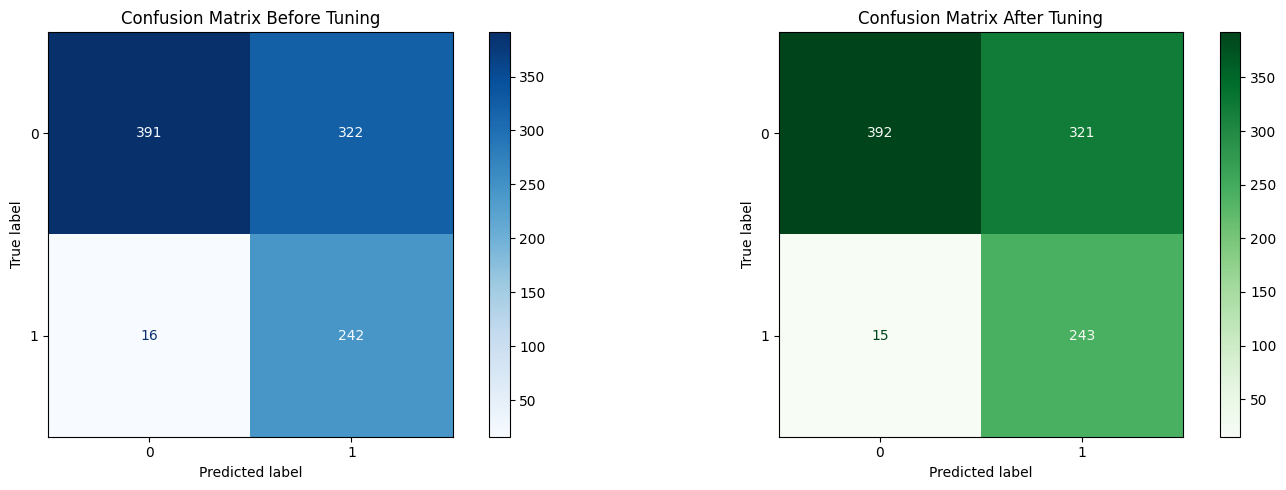

In [160]:
# Before tuning
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix before tuning
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb, cmap='Blues', ax=axs[0])
axs[0].set_title('Confusion Matrix Before Tuning')

# Confusion matrix after tuning
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap='Greens', ax=axs[1])
axs[1].set_title('Confusion Matrix After Tuning')

plt.tight_layout()
plt.show()

After tuning, there is a decrease in both the number of false negatives from 16 to 15 and false positives from 322 to 321. As false negatives are more detrimental to a company in the case of customer churn, the model after tuning gives the best result.

**Summary of Confusion Matrix**
|Label | Description | Total |
| ---------- | -------------- | -- |
| True Positive | Customer predicted to churn and actually churns | 243
| True Negative | Customer predicted to not churn and actually not churn | 392
| False Positive | Customer predicted to churn but actually not churn | 321
| False Negative | Customer predicted to not chur but actually churns | 15



In [163]:
# Get values for TN, FP, FN, TP
conf_matrix = confusion_matrix(y_test, y_pred_best)
tn = conf_matrix[0, 0]
fp = conf_matrix[0,1]
fn = conf_matrix[1, 0]
tp = conf_matrix[1, 1]

### ROC AUC Curve

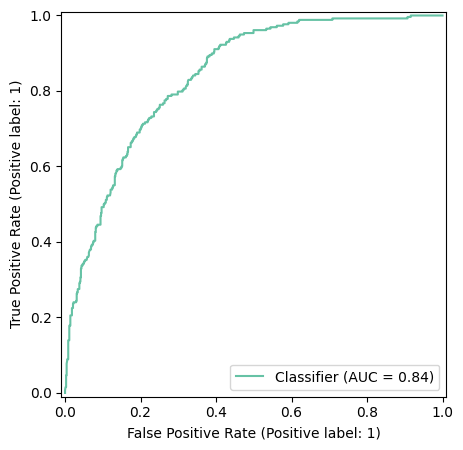

In [165]:
fig, ax = plt.subplots(figsize=(5,5))
roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_proba_best, ax=ax)


- The ROC curve represents the performance of a binary classification model.
- The AUC (Area Under the Curve) is a measure of the model's ability to distinguish between classes.
- An AUC of 0.84 indicates a good performance, as it is closer to 1 (perfect classification) than 0 (random classification).


### Feature Importance

In [168]:
features = list(best_model[0].get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['Dependents_Yes',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'tenure',
 'MonthlyCharges']

In [169]:
list_imp = best_model[-1].feature_importances_
list_imp

array([0.00109053, 0.03362563, 0.02687415, 0.02815807, 0.00377682,
       0.14218412, 0.03476107, 0.02895308, 0.0016557 , 0.01865237,
       0.01603325, 0.07419825, 0.26107556, 0.01750251, 0.27503211,
       0.0364268 ])

In [170]:
feature_imp = pd.DataFrame({
    'Feature':list_features,
    'Importance':list_imp
}).sort_values(by='Importance',ascending=False)

feature_imp

,Feature,Importance
14,tenure,0.275032
12,Contract_Two year,0.261076
5,InternetService_Fiber optic,0.142184
11,Contract_One year,0.074198
15,MonthlyCharges,0.036427
6,InternetService_No,0.034761
1,OnlineSecurity_No internet service,0.033626
7,DeviceProtection_No internet service,0.028953
3,OnlineBackup_No internet service,0.028158
2,OnlineSecurity_Yes,0.026874


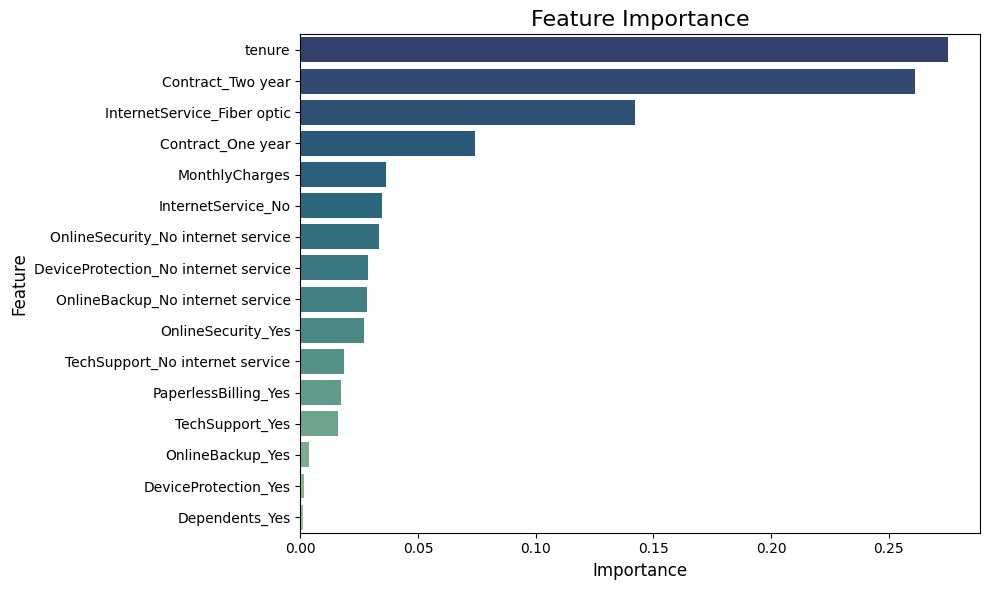

In [171]:
# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_imp, 
    x='Importance', 
    y='Feature', 
    palette='crest_r'  
)

plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

plt.show()

**Insights**

- The features with the highest importance are `tenure` and `Contract_Two year` with values above 0.25.
- `Dependents_Yes` is the feature with the lowest importance followed by `DeviceProtection_Yes`

### SHAP

In [173]:
X_train_preprocessed = best_model[0].transform(X_train)
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=list_features)

X_test_preprocessed = best_model[0].transform(X_test)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=list_features)

PermutationExplainer explainer: 972it [03:04,  5.05it/s]                         


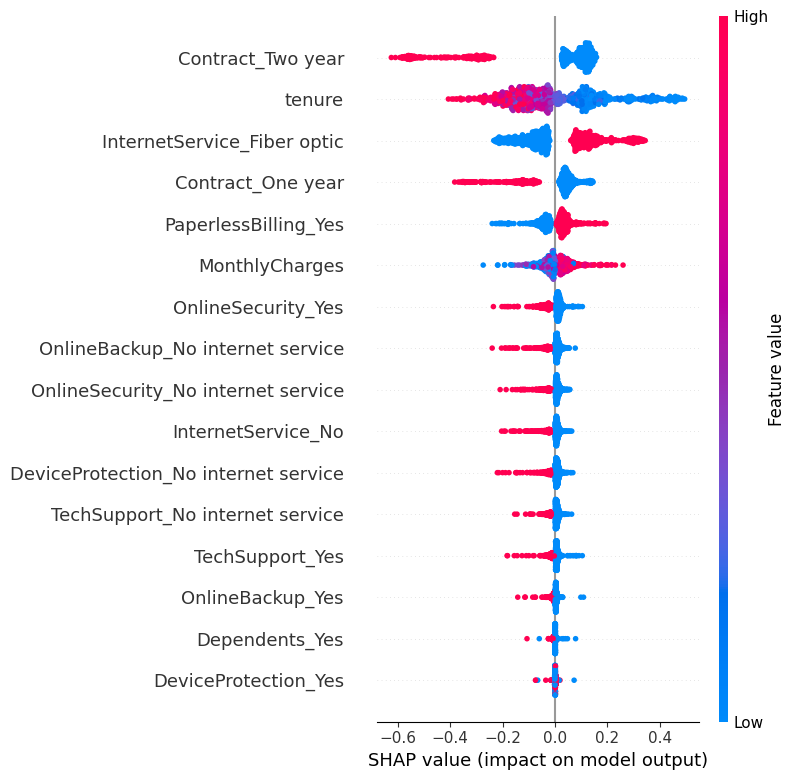

In [174]:
# Explainer
explainer = shap.Explainer(
    best_model[-1].predict,
    best_model[0].transform(X_test)
)

shap_values = explainer(X_test_preprocessed)
shap.summary_plot(shap_values, X_test_preprocessed)



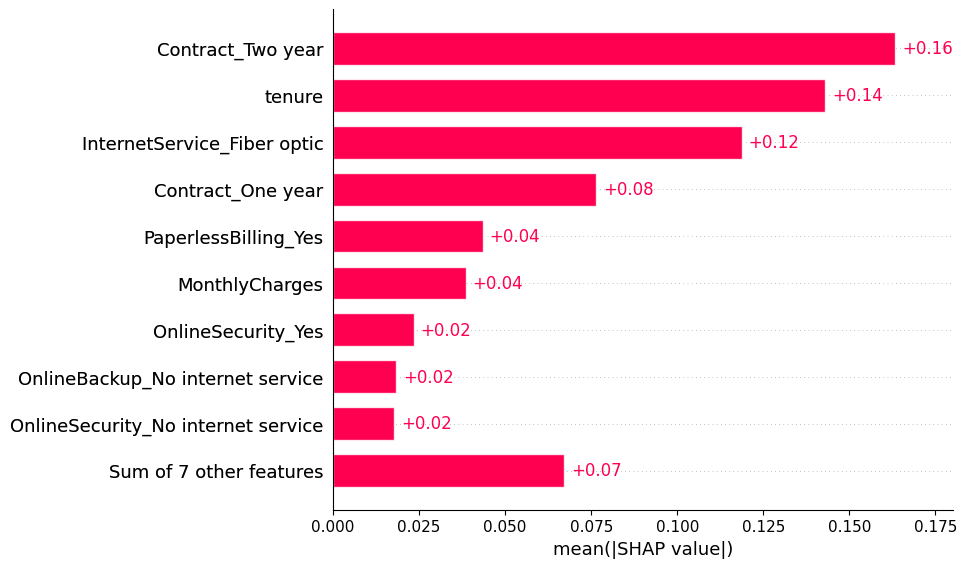

In [175]:
shap.plots.bar(shap_values)

### LIME

LIME explains the contribution of each features on the prediction of an individual instance. The left graph shows the prediction by the model and shows the prediction probabilities. The center graph shows how much each feature contributes to the prediction, with the top feature being the most impactful. The left graph shows the actual values of the feature. For categorical columns, it shows 0 (the feature is not true) and 1 (the feature is true). If two similar features have the value of 0, it means the remaining column is the one that is impactful.

In [177]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data= best_model[0].transform(X_train),
    feature_names=list_features,
    class_names=['Not Churn', 'Churn'],
    mode='classification'
 	)

In [178]:
i = 10

exp = explainer.explain_instance(
 	    data_row=X_test_preprocessed.iloc[i], 
 	    predict_fn=best_model['model'].predict_proba,
        )


exp.show_in_notebook(show_table=True)

**Insights**

- LIME show 
- This specific instance is predicted to highly likely to churn, with prediction probability of 0.98.
- `Contract Two year` is the most impactful feature with a contribution of 0.45, which is almost twice as higher as the next feature.
- As both `Contract Two year` and `Contract One year` have an actual value of 0, it means that customer have `Contract Month-to-Month` this feature is the factor that highly impacts the prediction.
- `Tenure` with a value of 0.1 means the customer has a short tenure, which is likely that this is a new customer.

### Save Model to Pickle


In [180]:
# # Final model
# best_gb = GradientBoostingClassifier(
#     learning_rate=0.01, max_depth=3,
#     max_features=5, min_samples_leaf=8, 
#     min_samples_split=15, n_estimators=450, 
#     subsample=0.7, random_state=rs
#     )

# gb_model = best_model

# # # Fit model
# gb_model.fit(X_train,y_train)

In [181]:
# with open('model.pkl', 'wb') as f:  # open a text file
#     pickle.dump(gb_model, f)

### Model Limitation

In [183]:
df.describe(percentiles=[]).loc[['min', 'max']]

,tenure,MonthlyCharges,Churn
min,0.0,18.80,0.0
max,72.0,118.65,1.0


In [184]:
pd.set_option('display.max_colwidth', 1)

# Show unique data in each column
listItem = []
for col in cat_cols :
    listItem.append( [col, df[col].unique()])

df_unique = pd.DataFrame(columns=['Column Name', 'Unique Values'],
                     data=listItem)
df_unique

,Column Name,Unique Values
0,Dependents,"[Yes, No]"
1,OnlineSecurity,"[No, Yes, No internet service]"
2,OnlineBackup,"[No, Yes, No internet service]"
3,InternetService,"[DSL, Fiber optic, No]"
4,DeviceProtection,"[Yes, No internet service, No]"
5,TechSupport,"[Yes, No, No internet service]"
6,Contract,"[Month-to-month, Two year, One year]"
7,PaperlessBilling,"[Yes, No]"


This model is limited to predict customer churn with a dataset that contains the following features with these values:

| Feature | Value Limitations | 
| ------ | -------------|
`tenure` | Between 0 to 72 months |
`MonthlyCharges` | Between 18.8 to 118.65
`Dependents`, `PaperlessBilling`| Yes, No
`InternetService` | DSL, Fiber optic, No
`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport` | Yes, No, No internet service
`Contract` | Month-to-month, Two year, One year

Data that contains additional features or other options for these features will not result in valid model prediction.

## Financial Analysis

**Customer Acquisition Cost (CAC)**

The cost to acquire new customers. We assume the CAC to be **$300**

**Customer Retention Cost (CRC)**

The cost to retain customers, which includes marketing spend. We assume CRC to be **$60** as CAC is typically 5 times higher than CRC.

**Customer Lifetime Value**

Customer Lifetime Value (CLV) is a measure of the total revenue a business can expect from a single customer throughout their relationship. The formula to calculate CLV is:

*CLV = Average  Revenue per User x Average Customer Lifespan*

Average Revenue per User = Total Revenue / Total User <br>
Average Customer Lifetime = How long a customer stays with a company (months)

**Total Cost** = CAC + CRC

**Revenue Loss** = Number of Customer Churn x CLV

**Total Revenue** = Total Customers x CLV 

**Net Revenue** = Total Revenue - (Total Cost + Revenue Loss)


In [187]:
# Result of model prediction
tn, fp, fn, tp = conf_matrix.ravel()

# Average Revenue
avg_revenue = df['MonthlyCharges'].mean()

# Average Customer Lifespan
avg_lifespan = df['tenure'].mean()

# CLV 
clv = avg_revenue * avg_lifespan

# CAC
cac = 300

# CRC
crc = 60

print(f'Average Revenue per Customer: ${avg_revenue:.2f}')
print(f'Average Customer Lifespan: {avg_lifespan:.2f}')
print(f'Average Customer Lifetime Value: ${clv:.2f}')
print(f'Cost of Aquisition: ${cac}')
print(f'Cost of Retention: ${crc}')


Average Revenue per Customer: $65.32
Average Customer Lifespan: 32.68
Average Customer Lifetime Value: $2134.71
Cost of Aquisition: $300
Cost of Retention: $60


**Before using Machine Learning**

In [189]:
# Cost 
total_cust = sum([tn, fp, fn, fp])
crc_before = total_cust * crc
cac_before = (tp + fn) * cac
total_before = crc_before + cac_before

# Revenue Loss
loss_before = (tp + fn) * clv


# Net Revenue 
total_revenue = total_cust * clv

net_revenue_before = total_revenue - (total_before + loss_before)

print(f'Total Cost Before Machine Learning: ${total_before:,}')
print(f'Net Revenue Before Machine Learning ${net_revenue_before:,.2f}')



Total Cost Before Machine Learning: $140,340
Net Revenue Before Machine Learning $1,548,213.63


**After using Machine Learning**

In [191]:
crc_after = (tp + fp) * crc
cac_after = fn * cac
total_after = crc_after + cac_after

# Revenue Loss
loss_after = fn * clv

# Net Revenue
net_revenue_after = total_revenue - (total_after + loss_after)

print(f'Total Cost After Machine Learning: ${total_after:,}')
print(f'Net Revenue After Machine Learning ${net_revenue_after:,.2f}')

Total Cost After Machine Learning: $38,340
Net Revenue After Machine Learning $2,168,947.55


**Comparison of Costs and Revenue**

In [193]:
cost_df = pd.DataFrame(
    {'Condition' : ['Before ML', 'After ML'],
    'Total Cost' : [total_before, total_after]}
)

revenue_df = pd.DataFrame(
    {'Condition' : ['Before ML', 'After ML'],
    'Net Revenue' : [net_revenue_before, net_revenue_after]}
)

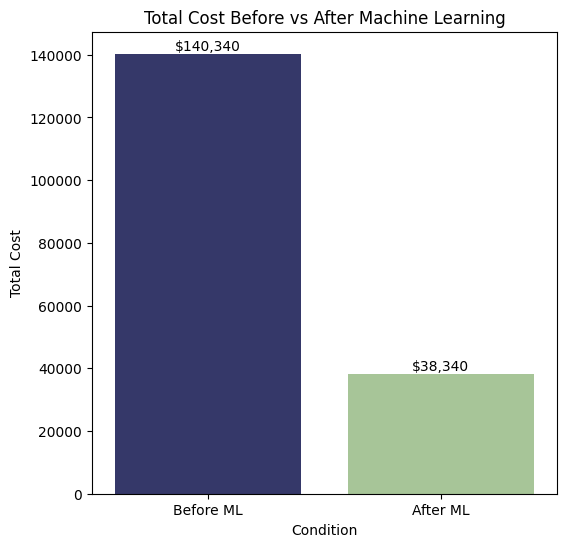

In [194]:
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=cost_df, x = 'Condition', y = 'Total Cost', hue = 'Total Cost', legend = False, palette='crest')
plt.title('Total Cost Before vs After Machine Learning')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='${:,.0f}')
plt.show()

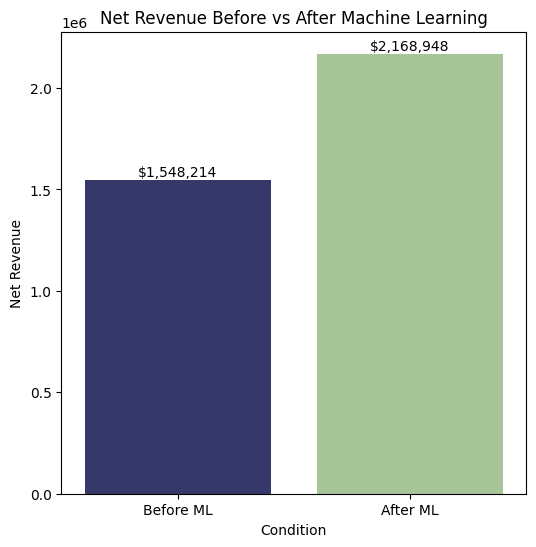

In [195]:
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=revenue_df, x = 'Condition', y = 'Net Revenue', hue = 'Net Revenue', legend = False, palette='crest_r')
plt.title('Net Revenue Before vs After Machine Learning')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='${:,.0f}')
plt.show()

## Conclusion 

- The best model is the Gradient Boosting Classifier using Instance Hardness Threshold undersampling method.
- As our data is imbalanced, our primary metric is the F2 score that balances between recall and precision, with an emphasis on recall. The F2 score of our model is 76 so our model can minimize the False Negatives while also minimizing the False Positives, leading to reduced CAC and CRC.
- The model has a high recall score of 94, meaning it is able to minimize the number of customers who actually churn incorrectly predicted as not churning. This minimize the revenue loss and acquisition cost to replace these customers.
- From our feature importance, SHAP, and LIME analysis the top contributing features are `Contract_Two Year` `tenure` and `InternetService_fiber optic`.
- Customers with short tenures are more likely to churn compared to those with longer tenures.
- Both low values (0) in `Contract_Two Year` and `Contract_One Year` largely impact the model predictions, meaning that customers with **Month-to-Month** contract are the ones that are likely to churn.
- With machine learning, we can reduce the total cost up to **73%**
  
    Total Cost **Before** ML: $140,340
  
    Total Cost **After** ML : $38,340
- Our net revenue increased **40%** with machine learning
  
    Net Revenue **Before** ML: $1,548,214
  
    Net Revenue **After** ML : $2,168,948

## Recommendation

### a. Model Improvements

- Increase minority class (churn) data to improve model prediction.
- Use other resampling methods, including a combination of undersampling and oversampling methods.
- Explore advanced models using deep learning.
- Develop customer segmentation models using clustering techniques to identify patterns of customers prone to churn.

### b. Business Strategies



Customer Service 


- Regular staff training to ensure optimal customer experience. 
- Conduct routine customer satisfaction survey through email or mobile app and evaluate the most common complaint.
- Optimize onboarding experience by offering accessible guides through website or app, video tutorials, etc. 

Marketing

- Create targeted marketing campaigns for ‘at-risk’ customers.
- Multichannel marketing to reach customers through their preferred channels.

Product

- Evaluate the quality of fiber optic service as it has the highest rate of churn.
- Develop personalized plans based on customer usage history.

Sales

- Offer discount & deals as reward for ‘at risk’ customers, especially for those who have filed complaints.
- Research prices of similar products or services to determine competitive pricing.
- Offer incentives for long-term contracts to reduce churn associated with month-to-month contracts.



